In [436]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [437]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

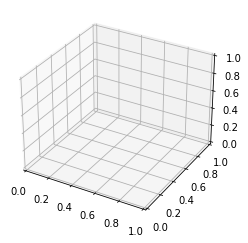

In [438]:
fig = plt.figure()
ax = plt.axes(projection='3d')

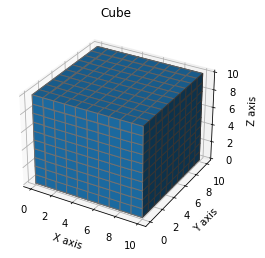

In [439]:
#Cube
cube = np.ones([10, 10, 10])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#print(type(data[0][0][0]))

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title("Cube")

cube_rot = np.rot90(cube, 1, (0, 2))

ax.voxels(cube_rot, edgecolors='grey');

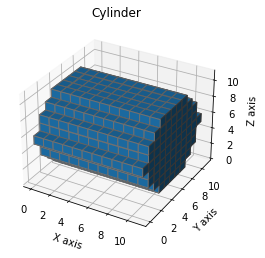

In [440]:
#Cylinder
def createEllipse(matrix, x, y, y_rad, x_rad):#matrix, x, y, y_radius, x_radius

    t = 0
    while(t < np.pi * 2):
        x_pos = int(x_rad * np.cos(t)) + x
        y_pos = int(y_rad * np.sin(t)) + y
        matrix[y_pos][x_pos] = 1
        
        if x_pos > x:
            start = x_pos - (x_pos-x)*2 
            for i in range(start, x_pos):
                matrix[y_pos][i] = 1
        t+=.01

    return matrix

cylinder = np.zeros((11, 11))#creating circle
cylinder = createEllipse(cylinder, 5, 5, 5, 5)
circle = cylinder

for i in range(0, 10):
    cylinder = np.dstack([cylinder, circle])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title("Cylinder")
cylinder_rot = np.rot90(cylinder, 1, (0, 2))
reg_cylinder = np.copy(cylinder_rot)
ax.voxels(cylinder_rot, edgecolors='grey');

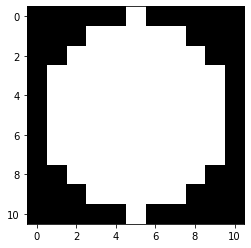

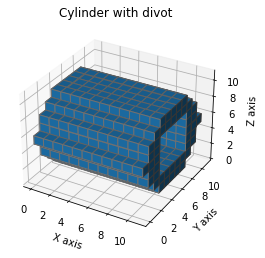

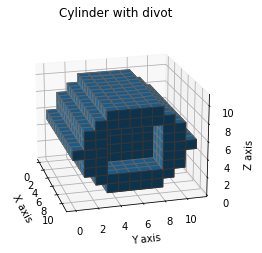

In [441]:
#Cylinder with a divot
plt.imshow(cylinder_rot[10], cmap = "gray", vmin=0, vmax=1);

edit_circle = cylinder_rot[10]
#print(edit_circle)
#3, 4
#7, 6
for i in range(3, 8):
    for j in range(3, 8):
        edit_circle[i][j] = 0.
#print(edit_circle)

cylinder_rot[9] = edit_circle
cylinder_rot[8] = edit_circle

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title("Cylinder with divot")
ax.voxels(cylinder_rot, edgecolors='grey');

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title("Cylinder with divot")
ax.voxels(cylinder_rot, edgecolors='grey');
ax.view_init(20, -15)
#divot with depth of 3

In [434]:
#flatten x for reg_cylinder
#use x_proj to try and pinpoint where missing voxels go
cylinder_x = np.copy(reg_cylinder)
X_DEPTH = len(cylinder_x)
cylinder_xproj = np.zeros((11, 11))
for i in range(X_DEPTH):
    cylinder_xproj = np.add(cylinder_xproj, cylinder_x[i])
    
print(cylinder_xproj)

[[ 0.  0.  0.  0.  0. 11.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 11. 11. 11. 11. 11.  0.  0.  0.]
 [ 0.  0. 11. 11. 11. 11. 11. 11. 11.  0.  0.]
 [ 0. 11. 11. 11. 11. 11. 11. 11. 11. 11.  0.]
 [ 0. 11. 11. 11. 11. 11. 11. 11. 11. 11.  0.]
 [ 0. 11. 11. 11. 11. 11. 11. 11. 11. 11.  0.]
 [ 0. 11. 11. 11. 11. 11. 11. 11. 11. 11.  0.]
 [ 0. 11. 11. 11. 11. 11. 11. 11. 11. 11.  0.]
 [ 0.  0. 11. 11. 11. 11. 11. 11. 11.  0.  0.]
 [ 0.  0.  0. 11. 11. 11. 11. 11.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 11.  0.  0.  0.  0.  0.]]


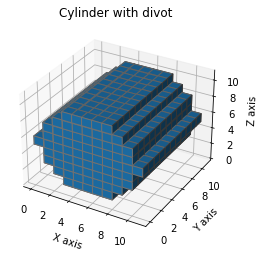

In [443]:
#length of x projection and y projection (if total of point == length, then no need to worry about being hollow)
#store "depth" by adding corresponding elements of stacked layers together

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title("Cylinder with divot")

#prep for flattening y axis maybe
cylinder_y = np.rot90(cylinder_rot, -1, (2, 0))
cylinder_y = np.rot90(cylinder_y, 1, (2, 1))
cylinder_y = np.rot90(cylinder_y, 1, (2, 0))

ax.voxels(cylinder_y, edgecolors='grey');

In [435]:
#flatten y for reg_cylinder
cylinder_y = np.rot90(reg_cylinder, -1, (2, 0))
cylinder_y = np.rot90(cylinder_y, 1, (2, 1))
cylinder_y = np.rot90(cylinder_y, 1, (2, 0))

Y_DEPTH = len(cylinder_y)
cylinder_yflat = np.zeros((11, 11))
for i in range(Y_DEPTH):
    cylinder_yflat = np.add(cylinder_yflat, cylinder_y[i])
cylinder_yflat_rot = np.rot90(cylinder_yflat, 1, (0,1))
print(cylinder_yflat_rot)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
 [ 7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.]
 [ 9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.]
 [ 9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [ 9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.]
 [ 9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.]
 [ 7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [444]:
depths = np.zeros([11])

#get largest depths in row to recreate shape through y projection, can use x_proj to try and pinpoint the position
#of missing voxels

for i in range(len(depths)):
    for j in range(len(cylinder_yflat_rot)):
        if depths[i] < cylinder_yflat_rot[i][j]:
            depths[i] = cylinder_yflat_rot[i][j]

#print(cylinder_yflat_rot)
y_proj = np.zeros([11,11,11])
center = 11//2

y_slice = np.zeros([11,11])


for i in range(len(y_proj)):
    y_slice = np.zeros([11,11])
    
    for j in range(len(y_proj[i])):
        if(depths[j] < 1): #skip row of zeros
            continue
        for k in range(len(y_proj[j][k])):
            #create slice to append to y_proj
            if cylinder_yflat_rot[j][k] < 1: #skip elements that are zero
                continue;
            if i < center:
                if (center - cylinder_yflat_rot[j][k]//2) <= i:
                    y_slice[j][k] = 1.
            elif i == center:
                y_slice[j][k] = 1.
            elif i > center:
                if (center + cylinder_yflat_rot[j][k]//2) >= i:
                    #print(f"i = {i} j = {j} k = {k} output: {int(center + cylinder_yflat_rot[j][k]//2)}")
                    y_slice[j][k] = 1.
                
    y_proj[i] = y_slice

"""
y_slice = np.zeros([11,11])    
for j in range(len(y_proj[2])):
    if(depths[j] < 1): #skip row of zeros
        continue
    for k in range(len(y_proj[2][0])):
        #create slice to append to y_proj
        if cylinder_yflat_rot[j][k] < 1: #skip elements that are zero
            continue;
        if 10 < center:
            if int(center - cylinder_yflat_rot[j][k]//2) <=10:
                #print(f"j = {j} k = {k} output: {int(center - cylinder_yflat_rot[j][k]//2)}")
                y_slice[j][k] = 1.
        elif 10 == center:
            y_slice[j][k] = 1.
        elif 10 > center:
            if (center + cylinder_yflat_rot[j][k]//2) >= 10:
                #print(f"j = {j} k = {k} output: {int(center - cylinder_yflat_rot[j][k]//2)}")
                y_slice[j][k] = 1.

""";

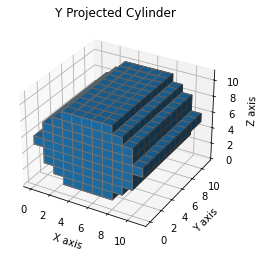

In [445]:
#only needed y_proj to make cylinder again
y_proj_copy = np.copy(y_proj)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title("Y Projected Cylinder")

y_proj_copy = np.rot90(y_proj_copy, -1, (1,2))

ax.voxels(y_proj_copy, edgecolors='grey');

In [425]:
#flatten x
cylinder_x = np.copy(cylinder_rot)
X_DEPTH = len(cylinder_x)
cylinder_xproj = np.zeros((11, 11))
for i in range(X_DEPTH):
    cylinder_xproj = np.add(cylinder_xproj, cylinder_x[i])

print(cylinder_xproj)

[[ 0.  0.  0.  0.  0. 11.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 11. 11. 11. 11. 11.  0.  0.  0.]
 [ 0.  0. 11. 11. 11. 11. 11. 11. 11.  0.  0.]
 [ 0. 11. 11.  8.  8.  8.  8.  8. 11. 11.  0.]
 [ 0. 11. 11.  8.  8.  8.  8.  8. 11. 11.  0.]
 [ 0. 11. 11.  8.  8.  8.  8.  8. 11. 11.  0.]
 [ 0. 11. 11.  8.  8.  8.  8.  8. 11. 11.  0.]
 [ 0. 11. 11.  8.  8.  8.  8.  8. 11. 11.  0.]
 [ 0.  0. 11. 11. 11. 11. 11. 11. 11.  0.  0.]
 [ 0.  0.  0. 11. 11. 11. 11. 11.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 11.  0.  0.  0.  0.  0.]]


In [426]:
Y_DEPTH = len(cylinder_y)
cylinder_yproj = np.zeros((11, 11))
for i in range(Y_DEPTH):
    cylinder_yproj = np.add(cylinder_yproj, cylinder_y[i])
cylinder_yproj_rot = np.rot90(cylinder_yproj, 1, (0,1))
print(cylinder_yproj_rot)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
 [ 7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.]
 [ 9.  9.  9.  9.  9.  9.  9.  9.  4.  4.  4.]
 [ 9.  9.  9.  9.  9.  9.  9.  9.  4.  4.  4.]
 [11. 11. 11. 11. 11. 11. 11. 11.  6.  6.  6.]
 [ 9.  9.  9.  9.  9.  9.  9.  9.  4.  4.  4.]
 [ 9.  9.  9.  9.  9.  9.  9.  9.  4.  4.  4.]
 [ 7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [427]:
depths = np.zeros([11])

#get largest depths in row to recreate shape through y projection

for i in range(len(depths)):
    for j in range(len(cylinder_yproj_rot)):
        if depths[i] < cylinder_yproj_rot[i][j]:
            depths[i] = cylinder_yproj_rot[i][j]

#print(cylinder_yflat_rot)
y_proj = np.zeros([11,11,11])
center = 11//2

y_slice = np.zeros([11,11])


for i in range(len(y_proj)):
    y_slice = np.zeros([11,11])
    
    for j in range(len(y_proj[i])):
        if(depths[j] < 1): #skip row of zeros
            continue
        for k in range(len(y_proj[j][k])):
            #create slice to append to y_proj
            if cylinder_yproj_rot[j][k] < 1: #skip elements that are zero
                continue;
            if i < center:
                if (center - cylinder_yproj_rot[j][k]//2) <= i:
                    y_slice[j][k] = 1.
            elif i == center:
                y_slice[j][k] = 1.
            elif i > center:
                if (center + cylinder_yproj_rot[j][k]//2) >= i:
                    #print(f"i = {i} j = {j} k = {k} output: {int(center + cylinder_yproj_rot[j][k]//2)}")
                    y_slice[j][k] = 1.
                
    y_proj[i] = y_slice

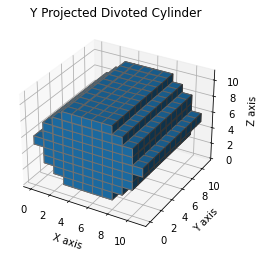

In [449]:
y_proj_copy = np.copy(y_proj)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title("Y Projected Divoted Cylinder")

y_proj_copy = np.rot90(y_proj_copy, -1, (1,2))


ax.voxels(y_proj_copy, edgecolors='grey');